In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load and Inspect the data

In [2]:
df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv", nrows=100000)
print("==========================")
print("First 5 values")
print(df.head())

print("==========================")
print("Describing the dataframe")
print(df.describe())

print("==========================")
print("Null values in each columns")
print(df.isnull().sum())

print("==========================")
print("Total gestures")
print(df['gesture'].value_counts())

First 5 values
              row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   
2  SEQ_000007_000002        Target  SEQ_000007                 2  SUBJ_059520   
3  SEQ_000007_000003        Target  SEQ_000007                 3  SUBJ_059520   
4  SEQ_000007_000004        Target  SEQ_000007                 4  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
2  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
3  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
4  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   

        pha

# Plot IMU sensor time series

In [3]:
# all rows related to the first sequence id
seq = df[df['sequence_id'] == df['sequence_id'].iloc[0]]

acc_cols = ['acc_x','acc_y','acc_z']
rot_cols = ['rot_w', 'rot_x','rot_y','rot_z']

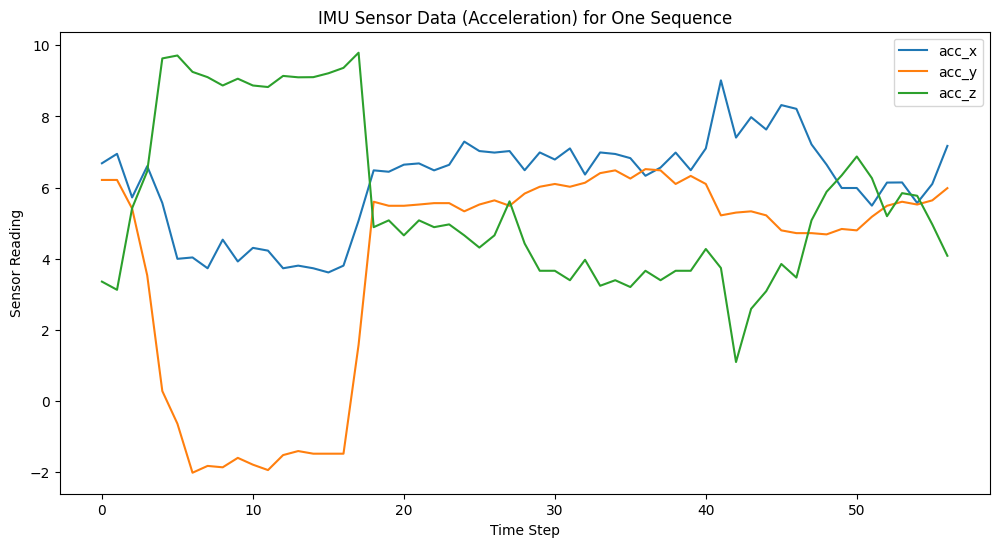

In [4]:
plt.figure(figsize=(12,6))
for axis in acc_cols :
    plt.plot(seq['sequence_counter'], seq[axis], label=axis)
plt.legend(); plt.title("IMU Sensor Data (Acceleration) for One Sequence")
plt.xlabel("Time Step"); plt.ylabel("Sensor Reading")
plt.show()

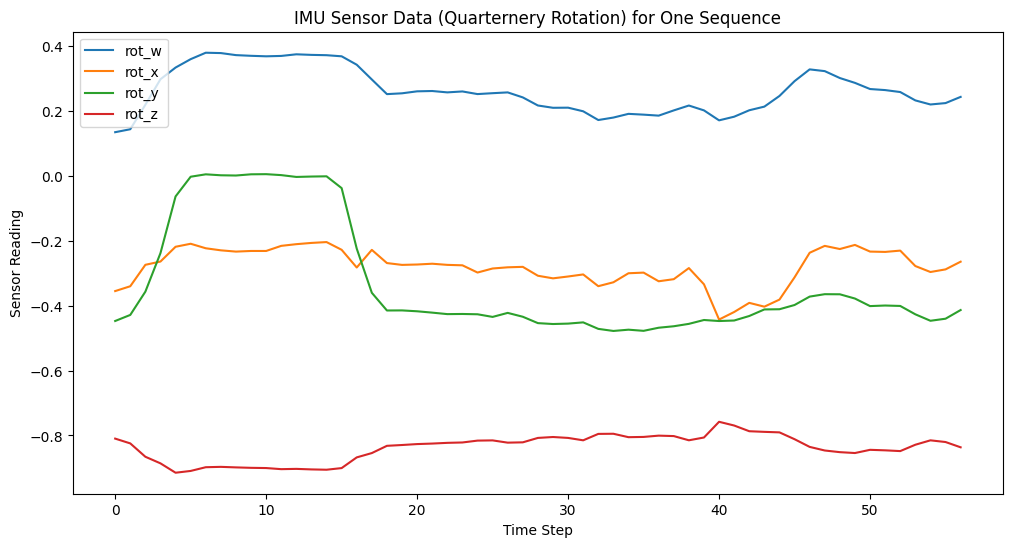

In [5]:
plt.figure(figsize=(12,6))
for axis in rot_cols :
    plt.plot(seq['sequence_counter'], seq[axis], label=axis)
plt.legend(); plt.title("IMU Sensor Data (Quarternery Rotation) for One Sequence")
plt.xlabel("Time Step"); plt.ylabel("Sensor Reading")
plt.show()

# Plot thermopile sensor data

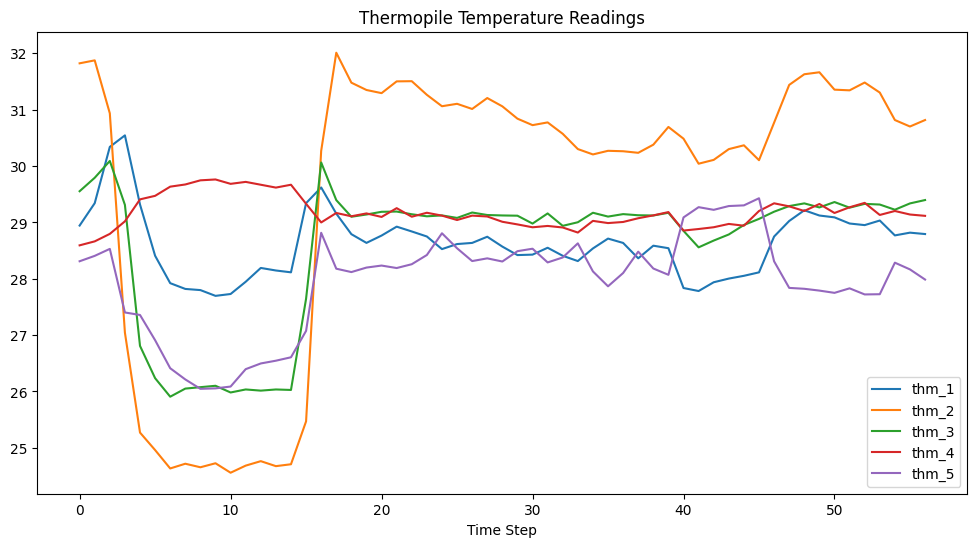

In [6]:
plt.figure(figsize=(12,6))
for i in range(1,6):
    plt.plot(seq['sequence_counter'], seq[f'thm_{i}'], label=f'thm_{i}')
plt.legend(); plt.title("Thermopile Temperature Readings"); plt.xlabel("Time Step")
plt.show()

# Visualize ToF frame

/tmp/ipykernel_35/411078599.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


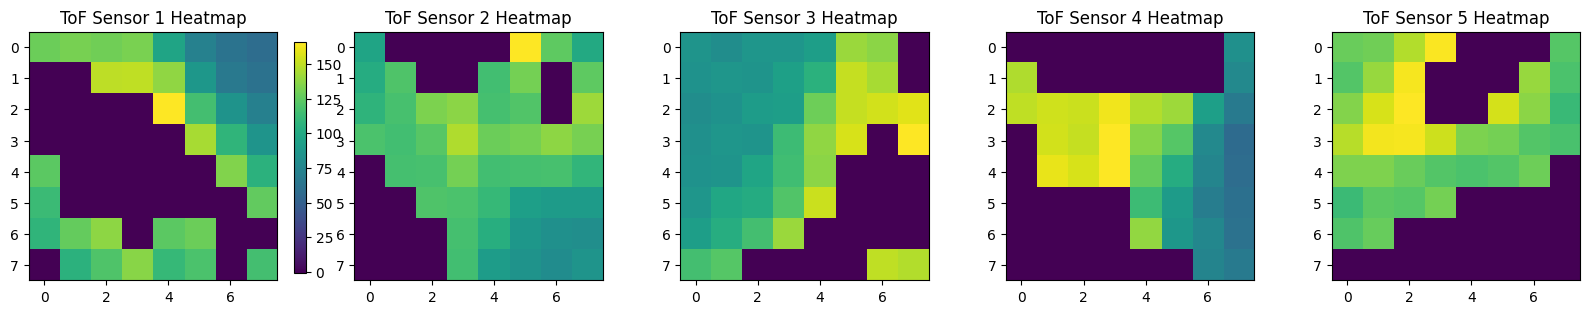

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for j in range(5):
    tof_cols = [f"tof_{j+1}_v{i}" for i in range(64)]
    frame = seq[tof_cols].iloc[0].values.reshape((8,8))
    im = axes[j].imshow(frame, cmap='viridis', interpolation='nearest')
    axes[j].set_title(f"ToF Sensor {j+1} Heatmap")

fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.92)
plt.tight_layout()
plt.show()

# Gesture comparison

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Compare acc_x Signal')

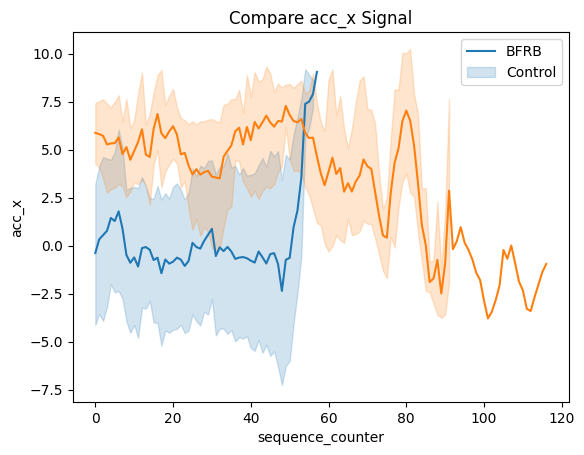

In [31]:
targets = df[df['gesture'].str.contains('Cheek - pinch skin')]
ctr = df[df['gesture']=='Drink from bottle/cup']
sns.lineplot(x='sequence_counter', y='acc_x', data=targets.iloc[:500])
sns.lineplot(x='sequence_counter', y='acc_x', data=ctr.iloc[:500])
plt.legend(["BFRB", "Control"]); plt.title("Compare acc_x Signal")

# Explore Distribution and Missingness

<Axes: >

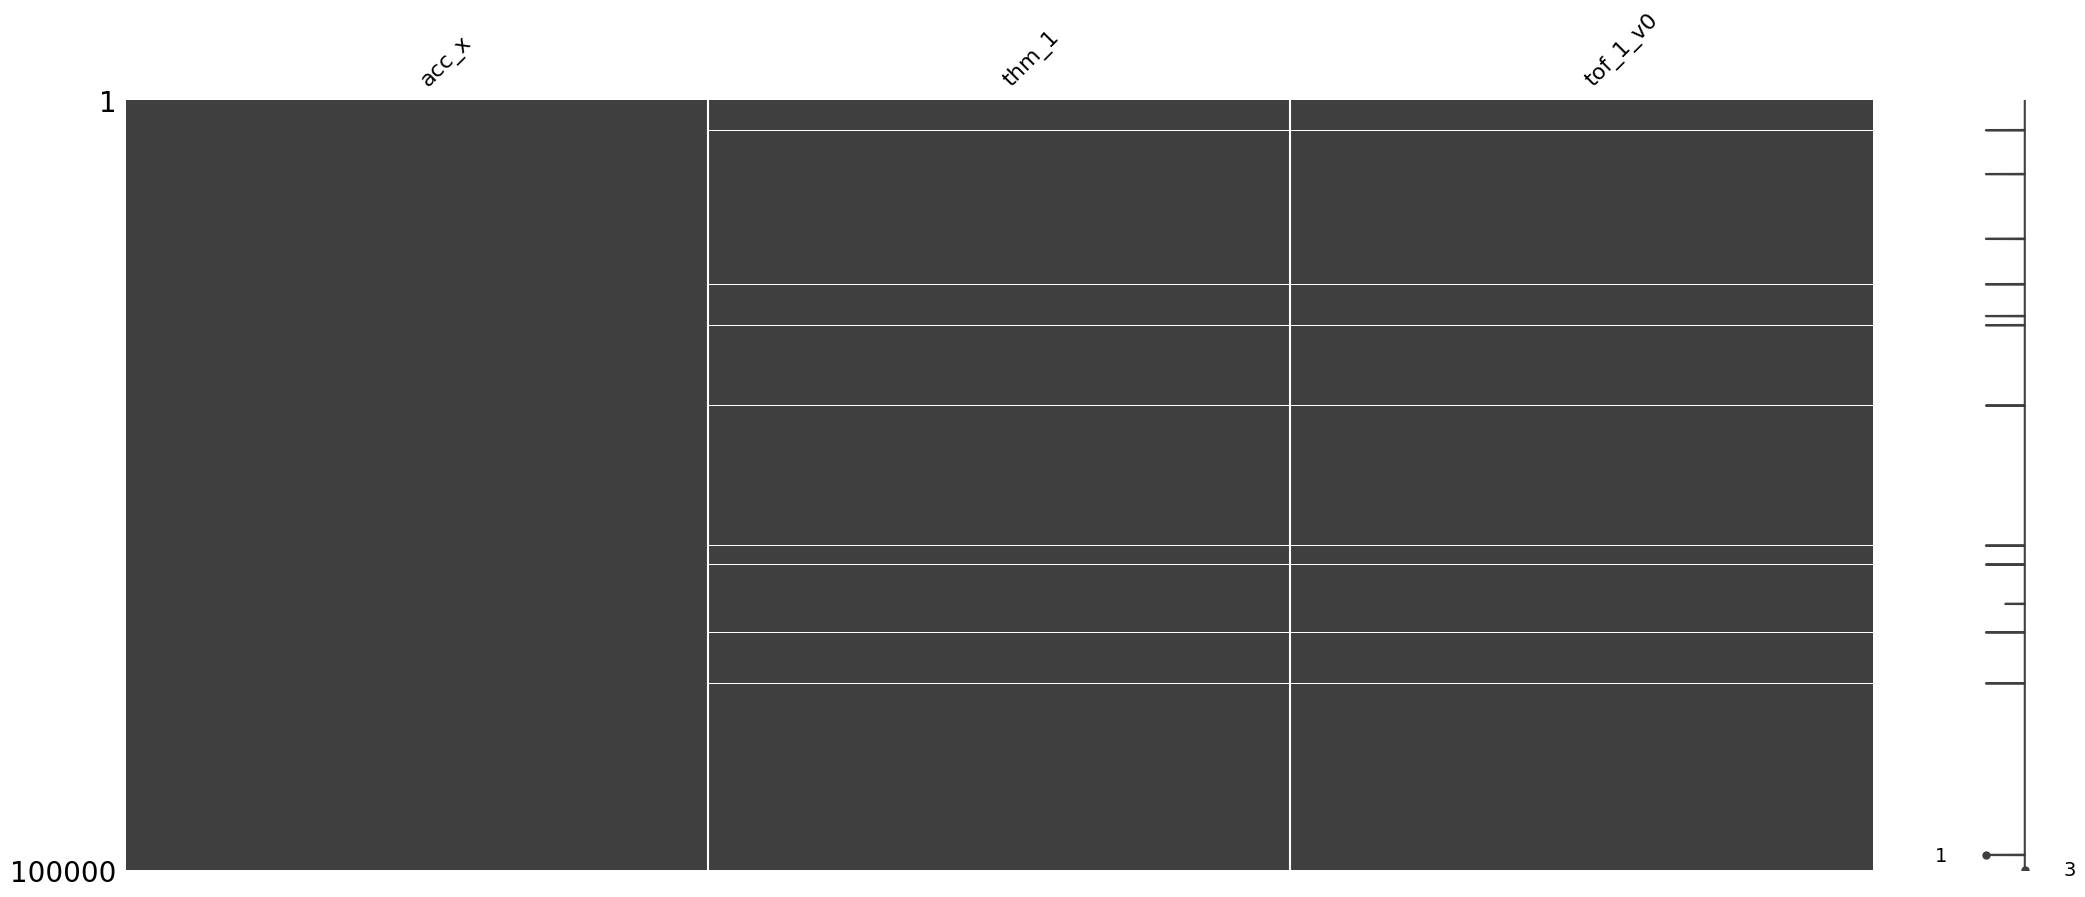

In [32]:
import missingno as msno

msno.matrix(df[['acc_x','thm_1','tof_1_v0']])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Thermopile 1 Distribution')

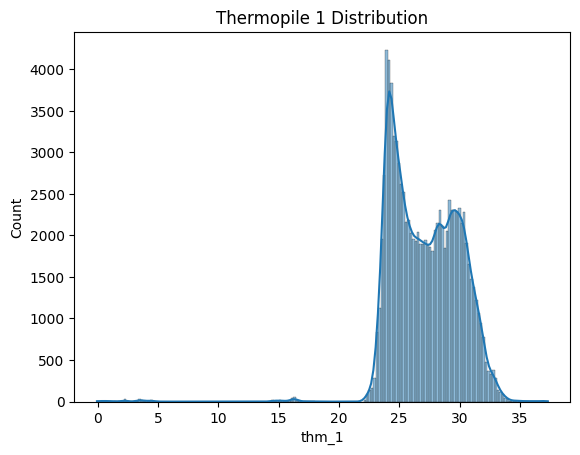

In [33]:
sns.histplot(df['thm_1'].dropna(), kde=True)
plt.title("Thermopile 1 Distribution")